In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split,cross_val_score,KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler


plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Import The Limited Power Dataset

In [8]:
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Lim_solar_data.csv')


df.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L


# Divide the dataset into Train-test split and do the standard scalling

In [9]:
def split_transform(df, split_ratio):
    X=df.iloc[:,1:-1]
    Y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=split_ratio,shuffle=True)

    scaler=StandardScaler()
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    
    print("The number of samples in the Training set is {}".format(len(X_sc_train)))
    print("The number of samples in the Test set is {}".format(len(X_sc_test)))
    
    return  X_sc_train, X_sc_test,y_train,y_test,scaler

# Do Model training

In [12]:
def Model_with_cross_val(df,clf,k_fold,test_size):
    # Split transform the data
    X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.01)
    print("")

    # Generate k-fold with shuffled split. 
    # Samples are first shuffled and then split into a pair of train and test sets.
    cv = ShuffleSplit(n_splits=k_fold, test_size=test_size)   

    # get score for each split
    scores = cross_val_score(clf, X_sc_train, y_train, cv=cv, n_jobs=-1)

    #print scores with mean and std
    print(scores)
    
    print("{} accuracy with a standard deviation of {}".format(np.mean(scores),np.std(scores)))
    print("")

# Random Forest

In [13]:
clf = RandomForestClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.98029557 0.98029557 0.97506158 0.97690887 0.97383005]
0.9772783251231527 accuracy with a standard deviation of 0.002651360854878209



# Decision Trees

In [14]:
clf = DecisionTreeClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.94827586 0.9544335  0.96151478 0.95720443 0.96089901]
0.9564655172413794 accuracy with a standard deviation of 0.004835214391477971



# SVM

In [15]:
clf = SVC()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.94027094 0.93873153 0.93288177 0.94150246 0.93780788]
0.9382389162561576 accuracy with a standard deviation of 0.0029633520727871663



# KNN

In [16]:
clf = KNeighborsClassifier(n_neighbors=5)
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.95289409 0.94981527 0.94827586 0.95043103 0.94704433]
0.949692118226601 accuracy with a standard deviation of 0.0019914977375364885



# Logistic Reg

In [17]:
clf = LogisticRegression()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.69334975 0.69027094 0.69458128 0.69612069 0.69057882]
0.6929802955665025 accuracy with a standard deviation of 0.0022658090508588967



# Naive Byes

In [18]:
clf = GaussianNB()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.73429803 0.7635468  0.75307882 0.75246305 0.7567734 ]
0.7520320197044336 accuracy with a standard deviation of 0.009704089664084677



# Do prediction with best performing Model

The number of samples in the Training set is 8748
The number of samples in the Test set is 2187


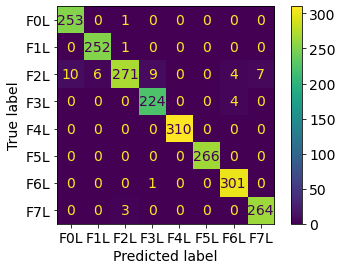

In [29]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.2)

Model = RandomForestClassifier()
Model.fit(X_sc_train,y_train)


disp = ConfusionMatrixDisplay.from_estimator(
    Model,
    X_sc_test,
    y_test,
    display_labels=Model.classes_)     # Model.classes_ return --> array(['F0L', 'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L'],dtype=object)